# NB and Logistic Regression Project 

Welcome to NB and Logistic Regression Project! Go ahead and follow the directions below.

**Build a classification model which will recognise the activities through the mobile sensor like walking, walking_upstairs  ,walking_downstairs ,sitting  ,standing,lying.The topic Human Activity recognition is in research and has its own advantages like anomaly detection, for healthy diet maintenance fitness bands are used , measuring stress level ,for monitoring employees ,for heartbeat pulse rate etc. In this project we are going to focus on  the dataset which was carried out through experiments with a group of 30 volunteers wearing a smartphone.The experiments have been video-recorded to label the data manually.The  main motto is to use the dataset and work with the libraries like scikit learn and machine learning related libraries and algorithms while training.**

# <font color='red'>Download and submit only HTML file</font>

###### Group members
* POLISETTY SRIMAHAVISHNU - 2019A4PS0321H


# Import Libraries
**Import pandas,seaborn, and the usual libraries.**

In [134]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [135]:
import os

In [136]:
from sklearn.preprocessing import MinMaxScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV,LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

In [137]:
os.getcwd()

'F:\\ML assignment'

In [138]:
os.chdir('F:\\ML assignment')

In [139]:
data=pd.read_csv('KAUSTAV CHATTERJI - human_activity.csv')

In [140]:
data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [141]:
data.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,17.413085
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122,8.975143
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414,8.000000
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181,19.000000
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659,26.000000
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000,30.000000


# EDA and Basic Data Preprocessing and Preparation [Marks:2]
**If trying auto EDA do it in a different notebook and only highlight important, interesting or unusual pattern that you noticed in the data**

<font color='red'>Give justification for your choices and techniques used for every step</font>

In [142]:
#USED SWEETVIZ FOR AUTO EDA in different notebook

In [143]:
#FOUND HIGH CORRELATION BETWEEN MANY FEATURES 

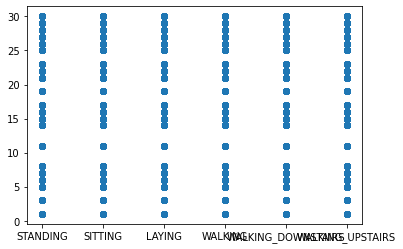

In [144]:
plt.scatter(data['Activity'], data['subject'])
plt.show()

In [145]:
# The subject id number has no relation to the results so drop it

In [146]:
data=data.drop(['subject'], axis=1)

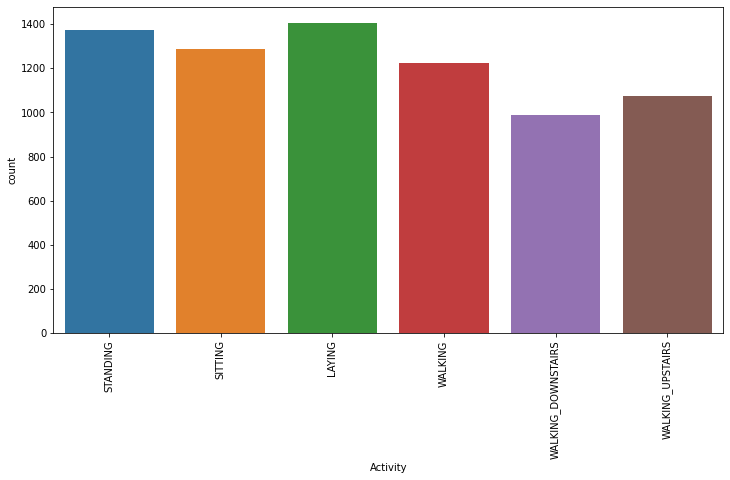

In [147]:
plt.figure(figsize=(12,6))
axis=sns.countplot(x="Activity",data=data)
plt.xticks(x=data['Activity'],rotation='vertical')
plt.show()

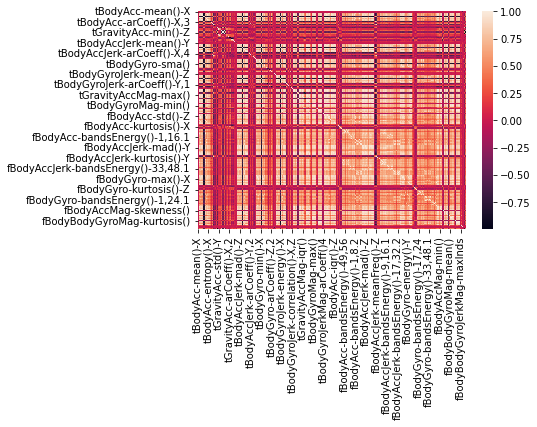

In [148]:
dataplot=sns.heatmap(data.corr())
plt.show()

## Null/Outlier Treatment

In [149]:
data.columns[data.isnull().any()]

Index([], dtype='object')

In [150]:
#no columns have null values

In [151]:
data.columns[data.isna().any()]

Index([], dtype='object')

In [152]:
#outlier detection
data1=data.drop(['Activity'],axis=1)

In [153]:
def remove_outliers(data,n_std):
    for col in data.columns:
        
        
        mean = data[col].mean()
        sd = data[col].std()
        
        data = data[(data[col] <= mean+(n_std*sd))]
        
    return data

In [154]:
Y=data['Activity']#target data

In [155]:
Y.replace(['LAYING', 'STANDING','SITTING','WALKING','WALKING_UPSTAIRS','WALKING_DOWNSTAIRS'],
                        [1,2,3,4,5,6], inplace=True)

In [156]:
X=data1

In [157]:
remove_outliers(X,3)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
12,0.278457,-0.020415,-0.112732,-0.999135,-0.984680,-0.996274,-0.999077,-0.982937,-0.996410,-0.943906,...,0.689897,-0.686389,-0.878751,-0.077552,-0.101222,0.639084,0.765485,-0.850654,0.187611,-0.035998
58,0.280206,-0.018396,-0.107489,-0.996475,-0.994069,-0.991861,-0.997295,-0.994338,-0.993440,-0.939453,...,0.257536,-0.600093,-0.835428,0.198436,0.241702,-0.011947,-0.096105,0.398778,-0.546250,-0.431668
197,0.279380,-0.015438,-0.111270,-0.997897,-0.991525,-0.999242,-0.998623,-0.990537,-0.999755,-0.938301,...,0.752284,-0.864949,-0.971802,-0.047897,-0.224785,0.571943,0.518544,-0.673896,0.321025,0.050939
212,0.275644,-0.015470,-0.108208,-0.996583,-0.990505,-0.996329,-0.996910,-0.989824,-0.996692,-0.941146,...,0.546399,-0.519389,-0.790149,0.042952,-0.742735,0.677059,0.365962,-0.510461,-0.137407,-0.228804
423,0.272700,-0.017680,-0.104415,-0.997297,-0.997299,-0.989441,-0.997287,-0.996685,-0.989417,-0.945965,...,0.442217,-0.772114,-0.953085,-0.069731,-0.625512,0.386439,-0.120913,0.453947,-0.659481,-0.324968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7063,0.281213,-0.017136,-0.110965,-0.996051,-0.998186,-0.994245,-0.996338,-0.998093,-0.993843,-0.938763,...,0.765237,-0.552435,-0.814160,0.257540,-0.231588,0.700022,-0.450498,0.414869,-0.486316,-0.499157
7206,0.287296,-0.017104,-0.112975,-0.996231,-0.991786,-0.994782,-0.996651,-0.993123,-0.995175,-0.935258,...,0.359677,-0.783606,-0.967293,-0.164325,0.350370,0.002610,-0.227435,-0.230502,-0.236863,-0.376976
7207,0.285267,-0.017716,-0.112932,-0.996210,-0.995929,-0.996503,-0.996469,-0.995990,-0.996394,-0.935258,...,0.395302,-0.537412,-0.776738,-0.059678,0.445701,-0.227115,0.327626,-0.233064,-0.236545,-0.375200
7208,0.280109,-0.017881,-0.111748,-0.998300,-0.996869,-0.996957,-0.998593,-0.996048,-0.996493,-0.941262,...,0.419435,-0.314716,-0.568381,0.194656,-0.197896,-0.281663,0.009871,-0.235617,-0.236165,-0.373487


In [158]:
#data highly skewed so cannot remove rows

## Remove non-Important Features

In [159]:
#used PCA to remove non important features

In [160]:
from sklearn.decomposition import PCA

In [161]:
X_pca = PCA(n_components=2).fit_transform(X)

## Split Predictor and Target Varaibles

In [162]:
# X_pca has the predictor

In [163]:
#Y the target variables

## Split Training and Testing Data Set

In [164]:
x_train,x_test,y_train,y_test = train_test_split(X_pca,Y, test_size= 0.25, random_state = 355)

## Standardize the Variables

In [165]:
scalar=MinMaxScaler()
x_train = scalar.fit_transform(x_train)

In [166]:
x_test=scalar.fit_transform(x_test)

# Train Model using different variations of NB [Marks:2+1]
**Breifly describe & Justify why one of the variant performed better compared to others**

In [167]:
from sklearn.naive_bayes import GaussianNB

In [168]:
from sklearn.naive_bayes import MultinomialNB

In [169]:
from sklearn.naive_bayes import BernoulliNB

In [170]:
#imported all types of NAive Bayes

In [171]:
model1=GaussianNB()

In [172]:
model2=MultinomialNB()

In [173]:
model3=BernoulliNB()

In [174]:
model1.fit(x_train,y_train)

GaussianNB()

In [175]:
y_pred1 = model1.predict(x_test)

In [176]:
print(accuracy_score(y_test, y_pred1))

0.5027203482045702


In [177]:
model2.fit(x_train,y_train)

MultinomialNB()

In [178]:
y_pred2=model2.predict(x_test)

In [179]:
print(accuracy_score(y_test, y_pred2))

0.3661588683351469


In [180]:
model3.fit(x_train,y_train)

BernoulliNB()

In [181]:
y_pred3=model3.predict(x_test)

In [182]:
print(accuracy_score(y_test, y_pred3))

0.19477693144722524


In [183]:
#the Gaussian Naive Bayes performs the best in this case(has best accuracy) on test data as the predictor values have continuous data had it consist of discrete values other models could have performed better

# Compare time and accuracy of different NB algos [Marks:0.5]

In [184]:
%time model1.fit(x_train,y_train)

Wall time: 4.05 ms


GaussianNB()

In [185]:
%time y_pred1 = model1.predict(x_test)

Wall time: 1.33 ms


In [186]:
# time for GaussianNB highlighted shown above

In [187]:
print(accuracy_score(y_test, y_pred1))

0.5027203482045702


In [188]:
#Gaussian NB accuracy_score shown above

In [189]:
%time model2.fit(x_train,y_train)

Wall time: 2.88 ms


MultinomialNB()

In [190]:
%time y_pred2 = model2.predict(x_test)

Wall time: 1.01 ms


In [191]:
# time for MultinomialNB highlighted shown above

In [192]:
print(accuracy_score(y_test, y_pred2))

0.3661588683351469


In [193]:
#Multinomial NB accuracy_score shown above

In [194]:
%time model3.fit(x_train,y_train)

Wall time: 3.12 ms


BernoulliNB()

In [195]:
%time y_pred3 = model3.predict(x_test)

Wall time: 1.02 ms


In [196]:
# time for BernoulliNB highlighted shown above

In [197]:
print(accuracy_score(y_test, y_pred3))

0.19477693144722524


In [198]:
#Bernoulli NB accuracy_score shown above

In [199]:
#train time least for Gaussian NB highest for BernoulliNB 
#prediction time least for MultinomialNB highest for BernoulliNB

In [200]:
#accuracy_score least for Gaussian NB highest for BernoulliNB 

In [201]:
#the Gaussian Naive Bayes performs the best in this case(has best accuracy) on test data as the predictor values have continuous data had it consist of discrete values other models could have performed better

# Train Model with Logistic Regression with different solver and penalty [Marks:2+1]
**Justify why one of the solver or penalty performed better compared to others**

In [202]:
log_reg = LogisticRegression()

log_reg.fit(x_train,y_train)

LogisticRegression()

In [203]:
y_predl=log_reg.predict(x_test)

In [204]:
accuracy = accuracy_score(y_test,y_predl)
accuracy

0.5163220892274211

In [205]:
from sklearn.model_selection import GridSearchCV

In [206]:
solver_list = ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
parameters = dict(solver=solver_list)
lr = LogisticRegression(random_state=34, multi_class="auto", n_jobs=-1, C=1)
clf = GridSearchCV(lr, parameters, cv=5)
clf.fit(x_train, y_train)
scores = clf.cv_results_['mean_test_score']

for score, solver, in zip(scores, solver_list):
    print(f"{solver}: {score:.3f}")

C:\Users\Kaustav Chatterji\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:1523: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
C:\Users\Kaustav Chatterji\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:1523: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
C:\Users\Kaustav Chatterji\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:1523: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
C:\Users\Kaustav Chatterji\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:1523: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
C:\Users\Kaustav Chatterji\AppData\Roaming\Python\Python

liblinear: 0.515
newton-cg: 0.522
lbfgs: 0.522
sag: 0.522
saga: 0.522


In [207]:
log_reg2 = LogisticRegression(penalty='elasticnet',solver='saga',l1_ratio=0.5)

In [208]:
log_reg2.fit(x_train,y_train)

LogisticRegression(l1_ratio=0.5, penalty='elasticnet', solver='saga')

In [209]:
y_pred2=log_reg2.predict(x_test)

In [210]:
accuracy = accuracy_score(y_test,y_pred2)
accuracy

0.5233949945593036

In [211]:
# a bit increase in the accuracy

In [212]:
log_reg3 = LogisticRegression(penalty='l2',solver='newton-cg')

In [213]:
log_reg3.fit(x_train,y_train)

LogisticRegression(solver='newton-cg')

In [214]:
y_pred3=log_reg3.predict(x_test)

In [215]:
accuracy = accuracy_score(y_test,y_pred3)
accuracy

0.5163220892274211

In [216]:
#the model with elastic net penalty performs the best as it has both l1 and l2 penalty

# Compare time and accuracy of different Logistic Regression algos [Marks:0.5]

In [217]:
%time  log_reg.fit(x_train,y_train)

Wall time: 155 ms


LogisticRegression()

In [218]:
%time y_predl=log_reg.predict(x_test)

Wall time: 962 µs


In [219]:
# Time for default logistic regression

In [220]:
accuracy = accuracy_score(y_test,y_predl)
accuracy

0.5163220892274211

In [221]:
# accuracy for default logistic regression

In [222]:
%time log_reg2.fit(x_train,y_train)

Wall time: 30.8 ms


LogisticRegression(l1_ratio=0.5, penalty='elasticnet', solver='saga')

In [223]:
%time y_pred2=log_reg2.predict(x_test)

Wall time: 1.49 ms


In [224]:
# Time for predicting  logistic regression with penalty elasticnet and solver saga

In [225]:
accuracy = accuracy_score(y_test,y_pred2)
accuracy

0.5233949945593036

In [226]:
# accuracy for predicting  logistic regression with penalty elasticnet and solver saga

In [227]:
%time log_reg3.fit(x_train,y_train)

Wall time: 90.3 ms


LogisticRegression(solver='newton-cg')

In [228]:
%time y_pred3=log_reg3.predict(x_test)

Wall time: 937 µs


In [229]:
# Time for predicting using  logistic regression with newton-cg and l2 penalty

In [230]:
accuracy = accuracy_score(y_test,y_pred3)
accuracy

0.5163220892274211

In [231]:
#the accuracy for the model predicting using  logistic regression with newton-cg and l2 penalty

In [232]:
# accuracy for predicting  logistic regression with penalty elasticnet and solver saga is highest

In [233]:
#prediction time and fitting time is also minimum for logistic regression with penalty elasticnet and solver saga is highest

# Plot confusion Matrix for the final model selected [Marks:1]

In [234]:
# the final model chosen is the model formed by using logistic regression with penalty elasticnet and solver saga

In [235]:
from sklearn.metrics import confusion_matrix

In [236]:
 log_reg2.fit(x_train,y_train)

LogisticRegression(l1_ratio=0.5, penalty='elasticnet', solver='saga')

In [237]:
y_pred2=log_reg2.predict(x_test)

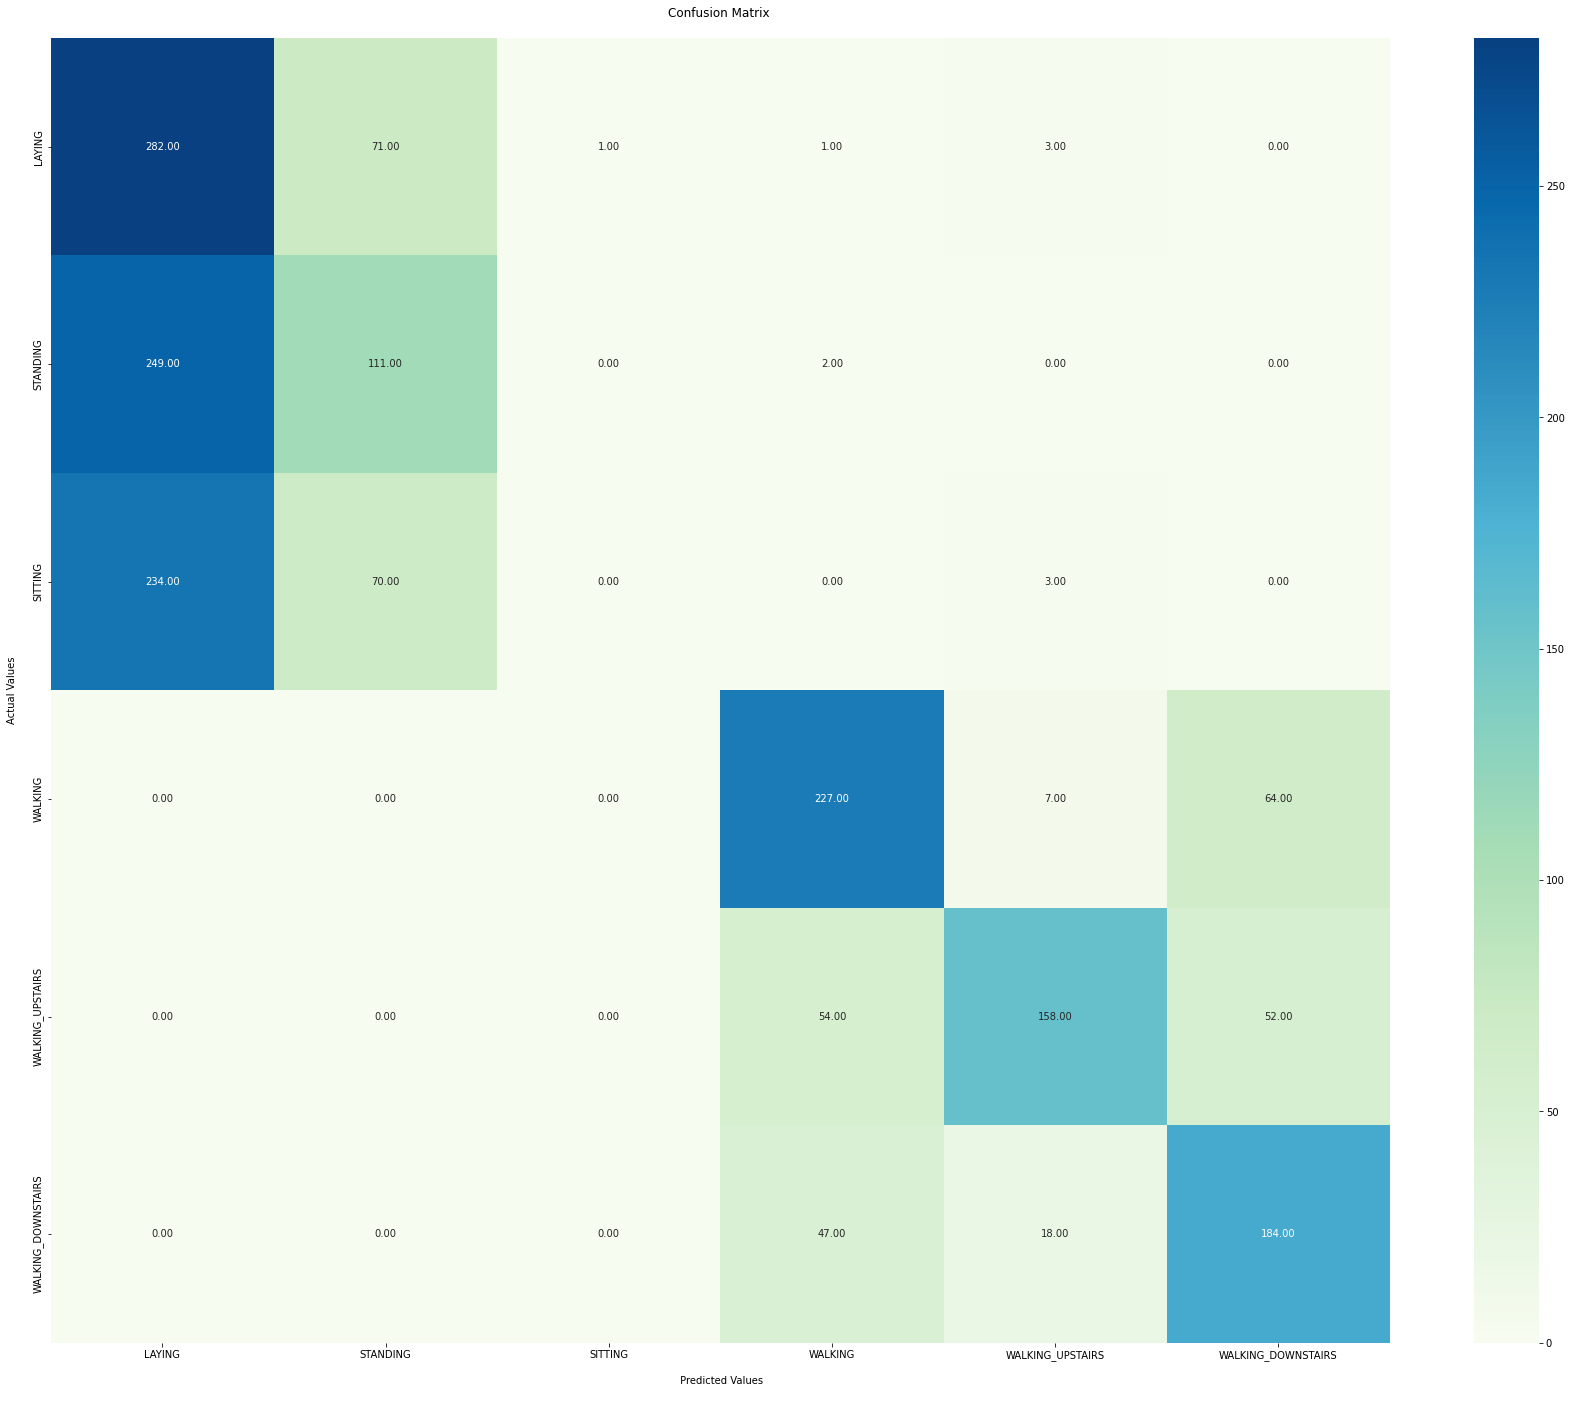

In [238]:
plt.figure(figsize=(30,24))
fx=sns.heatmap(confusion_matrix(y_test,y_pred2), annot=True, fmt=".2f",cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n')
fx.xaxis.set_ticklabels(['LAYING', 'STANDING','SITTING','WALKING','WALKING_UPSTAIRS','WALKING_DOWNSTAIRS'])
fx.yaxis.set_ticklabels(['LAYING', 'STANDING','SITTING','WALKING','WALKING_UPSTAIRS','WALKING_DOWNSTAIRS'])
plt.show()

In [239]:
accuracy = accuracy_score(y_test,y_pred2)
accuracy

0.5233949945593036

In [240]:
conf_mat = confusion_matrix(y_test,y_pred2)
conf_mat

array([[282,  71,   1,   1,   3,   0],
       [249, 111,   0,   2,   0,   0],
       [234,  70,   0,   0,   3,   0],
       [  0,   0,   0, 227,   7,  64],
       [  0,   0,   0,  54, 158,  52],
       [  0,   0,   0,  47,  18, 184]], dtype=int64)

In [241]:
recall = np.diag(conf_mat) / np.sum(conf_mat, axis = 1)
precision = np.diag(conf_mat) / np.sum(conf_mat, axis = 0)

In [242]:
Recall=np.mean(recall)
Recall

0.5322541616136369

In [243]:
Precision=np.mean(precision)
Precision

0.49070273583305984

In [244]:
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.5106345612688974

In [245]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
 lb = LabelBinarizer()
 lb.fit(y_test)
 y_test = lb.transform(y_test)
 y_pred = lb.transform(y_pred)
 return roc_auc_score(y_test, y_pred, average=average)

In [246]:
from sklearn.preprocessing import LabelBinarizer
auc=multiclass_roc_auc_score(y_test, y_pred2)
auc
#roc_auc_score

0.7175635495997305

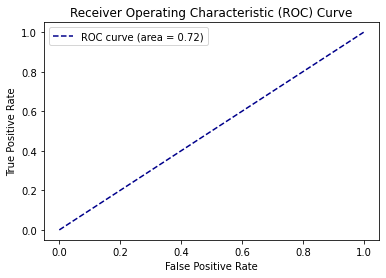

In [247]:
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()